<a href="https://colab.research.google.com/github/sylvas-j/ML/blob/master/Copy_of_Feature_Engineering_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Due to monthly income
# or distance from home 
# or performance ratings
# or Current Boss
# or no training
# TOo much work / overload

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.shape

(1470, 35)

THERE ARE SOME VARIABLEs WHICH NEED TO BE DROPPED FIRST BEFORE STARTTING ANYTHING                                                 
1) Above 80-90% are missing Values.     
2) Same Value for All rows.                    
3) Completely Unique Values for Each row                                           
4) No correlation at all with the Target Variable (Corr = 0) (x and Y)



In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
for i in df.columns:
    print (i , ":", df[i].value_counts())
    print (" _ "*40)
    print (" _ "*40)

Age : 35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Attrition : No     1233
Yes     237
Name: Attrition, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
BusinessTravel : Travel_Rarely   

In [ ]:
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print (" _ "*40)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Attrition : ['Yes' 'No']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
DailyRate : [1102  279 1373 1392  591 1005 

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:

df=df.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
df.shape

(1470, 31)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df[['RelationshipSatisfaction','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement']]


,RelationshipSatisfaction,JobSatisfaction,EnvironmentSatisfaction,JobInvolvement
0,1,4,2,3
1,4,2,3,2
2,2,3,4,2
3,3,3,4,3
4,4,2,1,3
...,...,...,...,...
1465,3,4,3,4
1466,1,1,4,2
1467,2,2,2,4
1468,4,2,4,2


In [ ]:
df['TotalSatisfaction_mean'] = (df['RelationshipSatisfaction']  + df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['JobInvolvement'] + df['WorkLifeBalance'])/5

def Satif(df) : 
    if  df['TotalSatisfaction_mean'] > 2.35 :
        return 1
    else : 
        return 0
    
    
df['Satif'] = df.apply(lambda df:Satif(df) ,axis = 1)


In [ ]:
df['Satif']

0       0
1       1
2       1
3       1
4       1
       ..
1465    1
1466    0
1467    1
1468    1
1469    1
Name: Satif, Length: 1470, dtype: int64

In [ ]:
df.shape

(1470, 33)

In [ ]:
df['JobSatisf_mean'] = (df['JobSatisfaction'] + df['JobInvolvement']) / 2

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean'],
      dtype='object')

In [ ]:
df['Satif']

0       0
1       1
2       1
3       1
4       1
       ..
1465    1
1466    0
1467    1
1468    1
1469    1
Name: Satif, Length: 1470, dtype: int64

In [ ]:
df.shape

(1470, 34)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean'],
      dtype='object')

In [ ]:
def MoovingPeople(df) :
    if df['NumCompaniesWorked'] > 4:
        return 1
    else:
        return 0
df['MoovingPeople'] = df.apply(lambda df:MoovingPeople(df), axis = 1)



In [ ]:
df.shape

(1470, 35)

In [ ]:
df['DistanceFromHome']

0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64

In [ ]:
def LongDis(df) : 
    if  df['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
df['LongDis'] = df.apply(lambda df:LongDis(df) ,axis = 1)


In [ ]:
def LongDisWL1(df) : 
    if  df['DistanceFromHome'] > 11 and df['WorkLifeBalance'] == 1 :
        return 1
    else : 
        return 0
df['LongDisWL1'] = df.apply(lambda df:LongDisWL1(df) ,axis = 1)

In [ ]:
def YoungAndBadPaid(df) : 
    if df['Age'] < 35 and df['Age'] > 23 and (df['MonthlyIncome'] < 3500):
        return 1
    else : 
        return 0
df['YoungAndBadPaid'] = df.apply(lambda df:YoungAndBadPaid(df) ,axis = 1)

In [ ]:
def MiddleTraining(df) :
    if df['TrainingTimesLastYear'] >= 3 and df['TrainingTimesLastYear'] <= 6:
        return 1
    else:
        return 0
df['MiddleTraining'] = df.apply(lambda df:MiddleTraining(df) ,axis = 1)

In [ ]:
df.shape

(1470, 39)

In [ ]:

def LongDisJL1(df) : 
    if  df['DistanceFromHome'] > 11 and df['JobLevel'] == 1 :
        return 1
    else : 
        return 0
df['LongDisJL1'] = df.apply(lambda df:LongDisJL1(df) ,axis = 1)

def ShortDisNotSingle(df) : 
    if  df['MaritalStatus'] != 'Single' and df['DistanceFromHome'] < 5:
        return 1
    else : 
        return 0
df['ShortDisNotSingle'] = df.apply(lambda df:ShortDisNotSingle(df) ,axis = 1)

def LongDisSingle(df) : 
    if  df['MaritalStatus'] == 'Single' and df['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
df['LongDisSingle'] = df.apply(lambda df:LongDisSingle(df) ,axis = 1)

def Engaged(df) : 
    if df['Age'] > 35 and df['MaritalStatus'] != 'Single':
        return 1
    else : 
        return 0
df['Engaged'] = df.apply(lambda df:Engaged(df) ,axis = 1)


def YoungNeverEngaged(df) : 
    if df['Age'] < 24 and df['MaritalStatus'] == 'Single' :
        return 1
    else : 
        return 0
df['YoungNeverEngaged'] = df.apply(lambda df:YoungNeverEngaged(df) ,axis = 1)


In [ ]:
df.shape

(1470, 44)

In [ ]:

df['Time_in_each_comp'] = (df['Age'] - 20) / ((df)['NumCompaniesWorked'] + 1)

df['Income_Distance'] = df['MonthlyIncome'] / df['DistanceFromHome']

df['Stability'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Stability'].fillna((df['Stability'].mean()), inplace=True)


df['Income_YearsComp'] = df['MonthlyIncome'] / df['YearsAtCompany']
df['Income_YearsComp'] = df['Income_YearsComp'].replace(np.Inf, 0)

df['Fidelity'] = (df['NumCompaniesWorked']) / df['TotalWorkingYears']
df['Fidelity'] = df['Fidelity'].replace(np.Inf, 0)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,LongDisJL1,ShortDisNotSingle,LongDisSingle,Engaged,YoungNeverEngaged,Time_in_each_comp,Income_Distance,Stability,Income_YearsComp,Fidelity
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,0,0,0,0,2.333333,5993.000000,0.666667,998.833333,1.000000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,0,0,0,1,0,14.500000,641.250000,0.700000,513.000000,0.100000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,0,0,0,0,2.428571,1045.000000,0.596061,0.000000,0.857143
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,1,0,0,0,6.500000,969.666667,0.875000,363.625000,0.125000
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,0,1,0,0,0,0.700000,1734.000000,1.000000,1734.000000,1.500000


In [ ]:
df.Fidelity

0       1.000000
1       0.100000
2       0.857143
3       0.125000
4       1.500000
          ...   
1465    0.235294
1466    0.444444
1467    0.166667
1468    0.117647
1469    0.333333
Name: Fidelity, Length: 1470, dtype: float64

In [ ]:
numeric_df= df.select_dtypes(include=[np.number])

categoric_df=df.select_dtypes(exclude=[np.number])

In [ ]:

numericcol=numeric_df.columns.tolist()


categorycol=categoric_df.columns.tolist()

print ("Category :",categorycol)


print ("\n Numeric :",numericcol)


Category : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

 Numeric : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalSatisfaction_mean', 'Satif', 'JobSatisf_mean', 'MoovingPeople', 'LongDis', 'LongDisWL1', 'YoungAndBadPaid', 'MiddleTraining', 'LongDisJL1', 'ShortDisNotSingle', 'LongDisSingle', 'Engaged', 'YoungNeverEngaged', 'Time_in_each_comp', 'Income_Distance', 'Stability', 'Income_YearsComp', 'Fidelity']


In [ ]:
df.shape

(1470, 49)

In [ ]:
df=df.drop(['DailyRate','MonthlyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'TotalSatisfaction_mean'],axis=1)

In [ ]:
df.shape

(1470, 38)

In [ ]:
### Coverting cateogrical to Numerical feature  ### One hot Encoding #### Get_Dummies
data = pd.get_dummies(df, columns=categorycol, drop_first=True)
data.columns
data.shape


(1470, 52)

In [ ]:
data.columns

Index(['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Satif',
       'JobSatisf_mean', 'MoovingPeople', 'LongDis', 'LongDisWL1',
       'YoungAndBadPaid', 'MiddleTraining', 'LongDisJL1', 'ShortDisNotSingle',
       'LongDisSingle', 'Engaged', 'YoungNeverEngaged', 'Time_in_each_comp',
       'Income_Distance', 'Stability', 'Income_YearsComp', 'Fidelity',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager

In [ ]:
### COnvert everything in to int 
for i in data.columns:
    data[i]=data[i].astype(int)

data.shape

(1470, 52)

In [ ]:
corr = data.corr()

In [ ]:
corr

,Age,Education,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.208034,0.509604,0.497855,0.003634,0.001904,0.037510,0.680381,-0.021490,0.311309,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185,0.028062
Education,0.208034,1.000000,0.101589,0.094961,-0.011111,-0.024539,0.018422,0.148280,0.009819,0.069114,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168,-0.020322
JobLevel,0.509604,0.101589,1.000000,0.950300,-0.034730,-0.021222,0.013984,0.782208,0.037818,0.534739,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072,0.000544
MonthlyIncome,0.497855,0.094961,0.950300,1.000000,-0.027269,-0.017120,0.005408,0.772893,0.030683,0.514285,...,-0.320906,0.619573,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.056767,-0.089361,0.006089
PercentSalaryHike,0.003634,-0.011111,-0.034730,-0.027269,1.000000,0.773550,0.007528,-0.020608,-0.003280,-0.035991,...,-0.020628,-0.005394,0.034682,-0.017017,0.032537,-0.046683,0.031102,0.020895,-0.001386,-0.005433
PerformanceRating,0.001904,-0.024539,-0.021222,-0.017120,0.773550,1.000000,0.003506,0.006744,0.002572,0.003435,...,0.010796,0.032050,0.029775,-0.035744,0.019416,-0.041401,-0.006214,0.009585,-0.001045,0.004369
StockOptionLevel,0.037510,0.018422,0.013984,0.005408,0.007528,0.003506,1.000000,0.010136,0.004129,0.015058,...,0.013386,-0.015637,0.007735,0.015807,-0.011635,0.015756,-0.048067,0.225574,-0.638957,-0.000449
TotalWorkingYears,0.680381,0.148280,0.782208,0.772893,-0.020608,0.006744,0.010136,1.000000,0.001008,0.628133,...,-0.215426,0.465837,0.064077,0.312148,-0.228119,-0.012241,-0.207726,0.053512,-0.089529,0.012754
WorkLifeBalance,-0.021490,0.009819,0.037818,0.030683,-0.003280,0.002572,0.004129,0.001008,1.000000,0.012089,...,-0.028209,0.005137,0.002011,0.034403,-0.058613,0.032092,0.045148,-0.006388,0.014921,-0.027092
YearsAtCompany,0.311309,0.069114,0.534739,0.514285,-0.035991,0.003435,0.015058,0.628133,0.012089,1.000000,...,-0.150181,0.330965,0.031968,0.153918,-0.154062,0.042602,-0.163464,0.044925,-0.070935,-0.011687


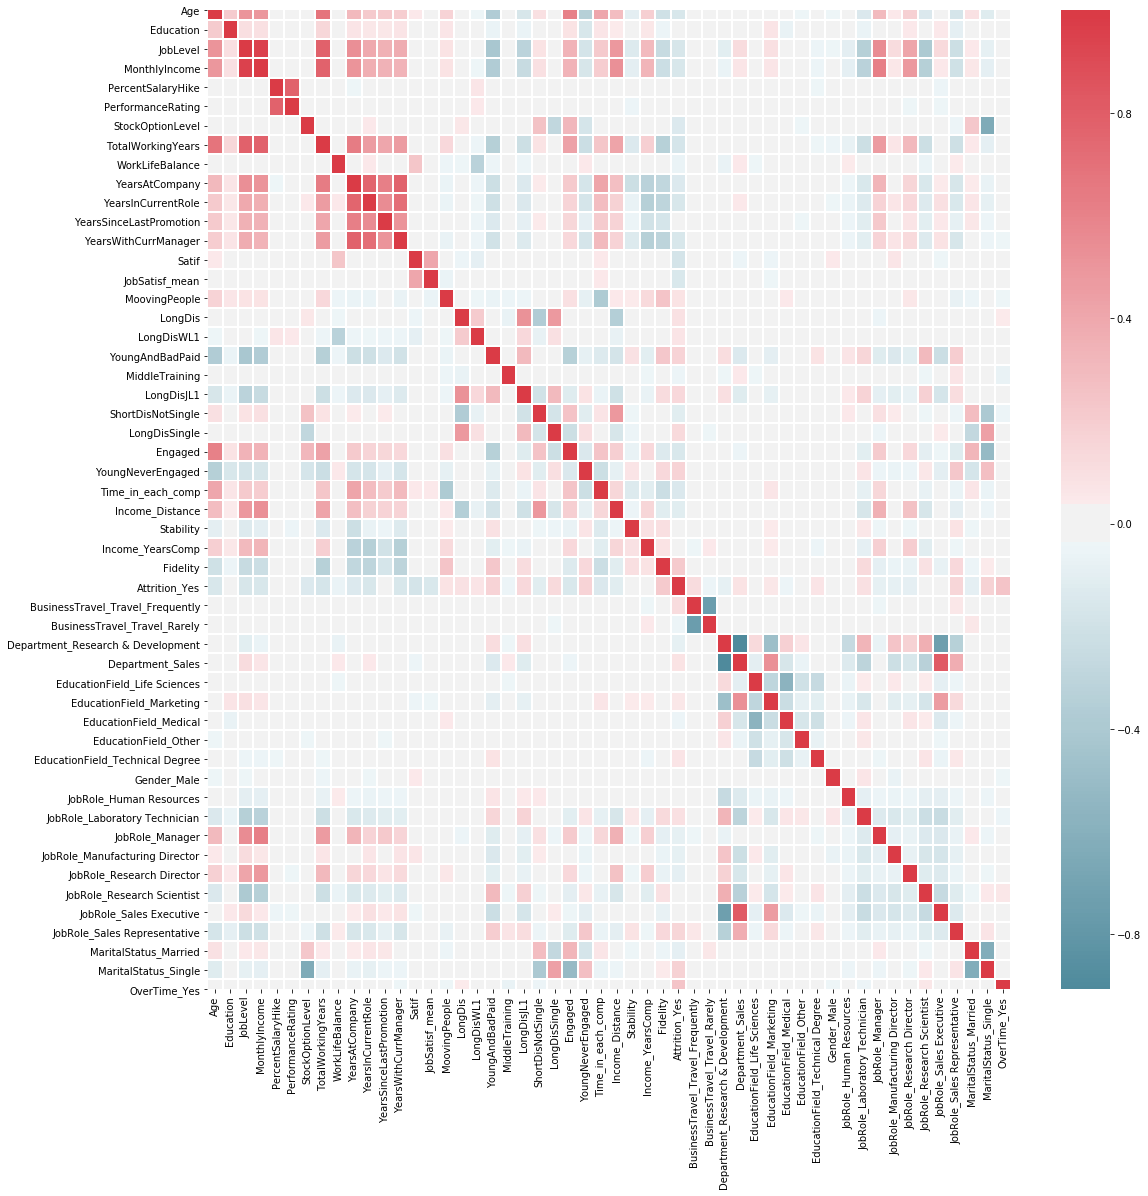

In [ ]:


# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [ ]:
data.columns

Index(['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Satif',
       'JobSatisf_mean', 'MoovingPeople', 'LongDis', 'LongDisWL1',
       'YoungAndBadPaid', 'MiddleTraining', 'LongDisJobS1', 'LongDisJL1',
       'ShortDisNotSingle', 'LongDisSingle', 'Engaged', 'YoungNeverEngaged',
       'Time_in_each_comp', 'Income_Distance', 'Stability', 'Income_YearsComp',
       'Fidelity', 'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 

In [ ]:
data.shape

(1470, 52)

In [ ]:
data=data.drop(['Education','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion','Stability','Income_YearsComp','EducationField_Life Sciences','EducationField_Other','Gender_Male','JobRole_Human Resources','JobRole_Research Scientist','JobRole_Sales Executive'],axis=1)



In [ ]:
data.shape

(1470, 40)

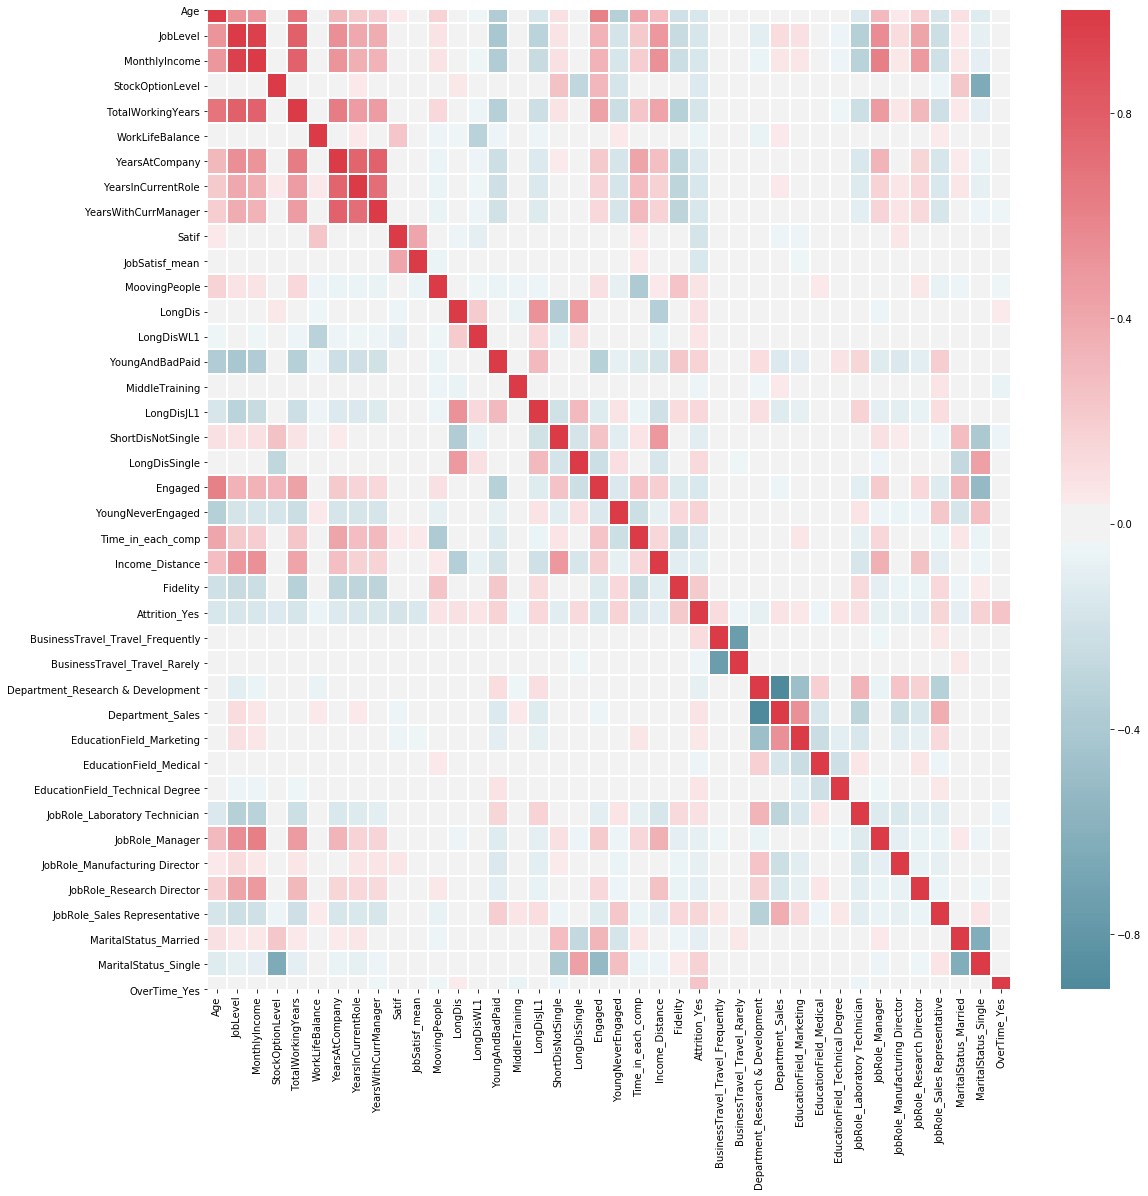

In [ ]:
corr = data.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [ ]:
x=data.drop('Attrition_Yes',axis=1)

In [ ]:
x

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Satif,...,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,5993,0,8,1,6,4,5,0,...,0,0,0,0,0,0,0,0,1,1
1,49,2,5130,1,10,3,10,7,7,1,...,0,0,0,0,0,0,0,1,0,0
2,37,1,2090,0,7,3,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,33,1,2909,0,8,3,8,7,0,1,...,0,0,0,0,0,0,0,1,0,1
4,27,1,3468,1,6,3,2,2,2,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,2571,1,17,3,5,2,3,1,...,1,0,1,0,0,0,0,1,0,0
1466,39,3,9991,1,9,3,7,7,7,0,...,1,0,0,0,0,0,0,1,0,0
1467,27,2,6142,1,6,3,6,2,3,1,...,0,0,0,0,1,0,0,1,0,1
1468,49,2,5390,0,17,2,9,6,8,1,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler 


In [ ]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(x)

 
X = pd.DataFrame(x_transform,columns=x.columns)
X

,Age,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Satif,...,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,-0.057788,-0.108350,-0.932014,-0.421642,-2.493820,-0.164613,-0.063296,0.245834,-2.346151,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-0.057788,-0.291719,0.241988,-0.164511,0.338096,0.488508,0.764998,0.806541,0.426230,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,-0.961486,-0.937654,-0.932014,-0.550208,0.338096,-1.144294,-1.167687,-1.155935,0.426230,...,-0.679141,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,-0.961486,-0.763634,-0.932014,-0.421642,0.338096,0.161947,0.764998,-1.155935,0.426230,...,-0.679141,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.961486,-0.644858,0.241988,-0.678774,0.338096,-0.817734,-0.615492,-0.595227,0.426230,...,1.472448,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.057788,-0.835451,0.241988,0.735447,0.338096,-0.327893,-0.615492,-0.314873,0.426230,...,1.472448,-0.314093,2.162331,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
1466,0.227347,0.845911,0.741140,0.241988,-0.293077,0.338096,-0.001333,0.764998,0.806541,-2.346151,...,1.472448,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241
1467,-1.086676,-0.057788,-0.076690,0.241988,-0.678774,0.338096,-0.164613,-0.615492,-0.314873,0.426230,...,-0.679141,-0.314093,-0.462464,-0.273059,3.022901,-0.239904,-0.244625,1.088232,-0.685565,1.591746
1468,1.322365,-0.057788,-0.236474,-0.932014,0.735447,-1.077862,0.325228,0.488900,1.086895,0.426230,...,1.472448,-0.314093,-0.462464,-0.273059,-0.330808,-0.239904,-0.244625,1.088232,-0.685565,-0.628241


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X.dropna()
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif

,VIF Factor,features
0,3.949934,Age
1,13.971852,JobLevel
2,18.347903,MonthlyIncome
3,1.899237,StockOptionLevel
4,5.454345,TotalWorkingYears
5,1.232012,WorkLifeBalance
6,4.820770,YearsAtCompany
7,2.755292,YearsInCurrentRole
8,2.888005,YearsWithCurrManager
9,1.337907,Satif


In [ ]:
X.columns

Index(['Age', 'JobLevel', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Satif', 'JobSatisf_mean',
       'MoovingPeople', 'LongDis', 'LongDisWL1', 'YoungAndBadPaid',
       'MiddleTraining', 'LongDisJobS1', 'LongDisJL1', 'ShortDisNotSingle',
       'LongDisSingle', 'Engaged', 'YoungNeverEngaged', 'Time_in_each_comp',
       'Income_Distance', 'Fidelity', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Technical Degree',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [ ]:
X=X.drop(['JobLevel','MonthlyIncome','Department_Research & Development'],axis=1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x.dropna()
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif

,VIF Factor,features
0,3.939167,Age
1,1.894186,StockOptionLevel
2,4.466943,TotalWorkingYears
3,1.225593,WorkLifeBalance
4,4.778892,YearsAtCompany
5,2.746426,YearsInCurrentRole
6,2.869972,YearsWithCurrManager
7,1.334513,Satif
8,1.356166,JobSatisf_mean
9,1.527027,MoovingPeople


In [ ]:
X.shape

(1470, 37)

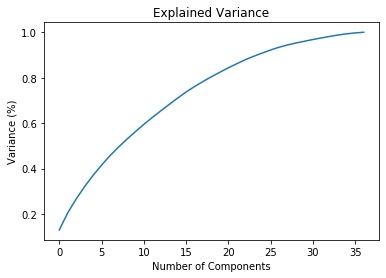

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()


principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


In [ ]:
pca = PCA(n_components=22)
new_data = pca.fit_transform(X)


In [ ]:
principal_x = pd.DataFrame(new_data,columns=[  f"column{i}" for i in range (22)])

In [ ]:
principal_x


,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
0,-0.889379,0.703964,-1.400781,0.198457,-2.562426,1.741262,0.824575,1.504587,-0.219605,2.100994,...,0.090425,-0.890858,0.866683,-1.002529,1.034498,1.308167,-0.435849,-0.401759,-0.009333,-2.023976
1,1.993828,-0.207483,0.408901,0.133288,2.673391,0.883158,0.018587,-0.250551,-0.600162,-0.511950,...,1.065419,0.513659,-0.237900,-0.275985,-0.087461,0.581072,-0.360803,-0.072190,0.785500,0.282737
2,-2.219837,-0.028701,-1.129235,-1.489633,-1.677212,0.625243,-0.315330,-0.376619,-0.357729,-0.021359,...,0.708511,-0.378556,1.031936,-0.797526,1.000108,-0.994320,-0.387842,-0.017552,-0.680611,1.015121
3,-0.520402,-1.247191,-0.619624,-0.328697,3.068047,0.245347,0.200294,0.958282,0.136904,0.273033,...,-0.179535,-1.299490,0.015196,-0.583459,0.691905,-1.471993,-1.825249,0.065488,0.443272,-0.079300
4,-2.258559,-3.150187,0.111042,-1.593315,-0.778739,-0.116752,1.415364,-0.171612,2.317929,-0.105338,...,-0.443939,-0.012531,-1.024796,-0.388526,1.243498,0.347440,-0.746968,1.236766,0.588012,0.412780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.065994,-0.910073,1.384607,-1.226628,2.624776,0.988149,-1.836072,-0.140933,0.078993,-1.401704,...,1.356669,1.428790,0.035130,0.488121,-0.687746,-0.272438,-0.659383,0.180620,-0.230248,-0.328969
1466,1.088711,-0.654716,1.032789,-0.013934,-0.946246,0.078865,2.572555,-0.972064,-0.369700,-1.571273,...,0.685696,0.703144,-0.159464,-0.865383,-0.839541,0.145046,-0.787629,0.258436,-0.604288,0.155155
1467,-0.274927,-1.882277,-0.288099,-0.591768,0.151005,-1.167163,-0.375768,-1.048141,-2.108387,1.045529,...,-2.001837,-0.432764,0.236969,0.022598,0.960747,-0.563202,-1.195288,-0.530288,-0.055215,0.239630
1468,2.435253,-0.562967,-0.364543,0.442783,1.996644,1.714604,0.546457,0.852599,-0.398480,-1.166707,...,0.475439,0.597823,-1.118025,-0.129740,0.036213,0.571471,-1.005323,1.545666,-0.224676,-0.568882


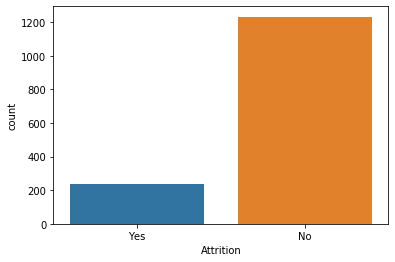

In [ ]:
sns.countplot(df['Attrition'])
plt.show()
